In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from numpy import zeros_like
from scipy.stats import multivariate_normal
import plotly.express as px

# Zadanie
Proszę wygenerować dane tak by 1. i 3. współrzędna były skorelowane a pozostałe nie.
Proszę zwizualizować tą zależność za pomocą 

- sns.pairplot
- sns.heatmap

Genereuje punkty:

In [3]:
n = 1000
x1 = stats.norm(0, 1).rvs(n)
x2 = stats.norm(0, 1).rvs(n)
x4 = stats.norm(0, 1).rvs(n)
X = np.stack((x1, x2, 2 * x1, x4), 1)

Rysuje punkty jako pray współrzednych: 

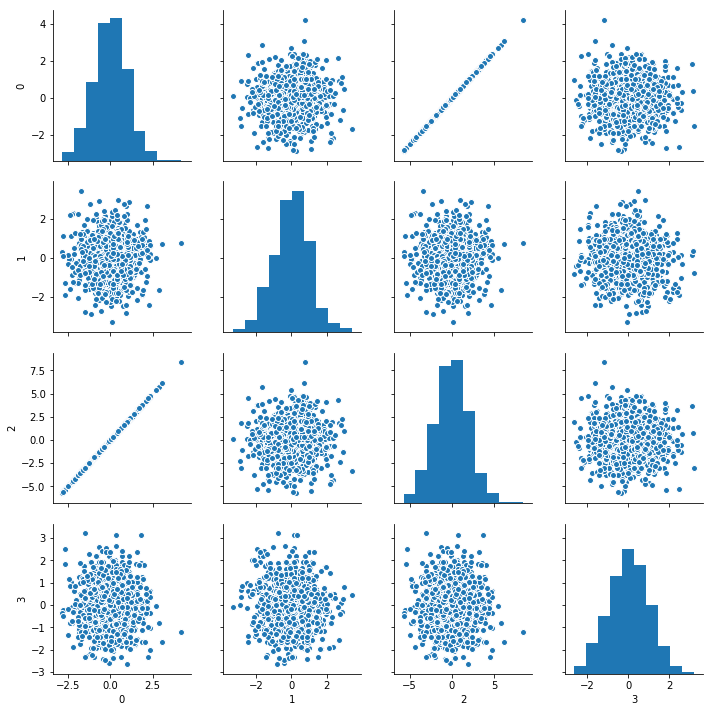

In [6]:
df = pd.DataFrame(X)
sns.pairplot(df)  #, kind="reg"
plt.show()

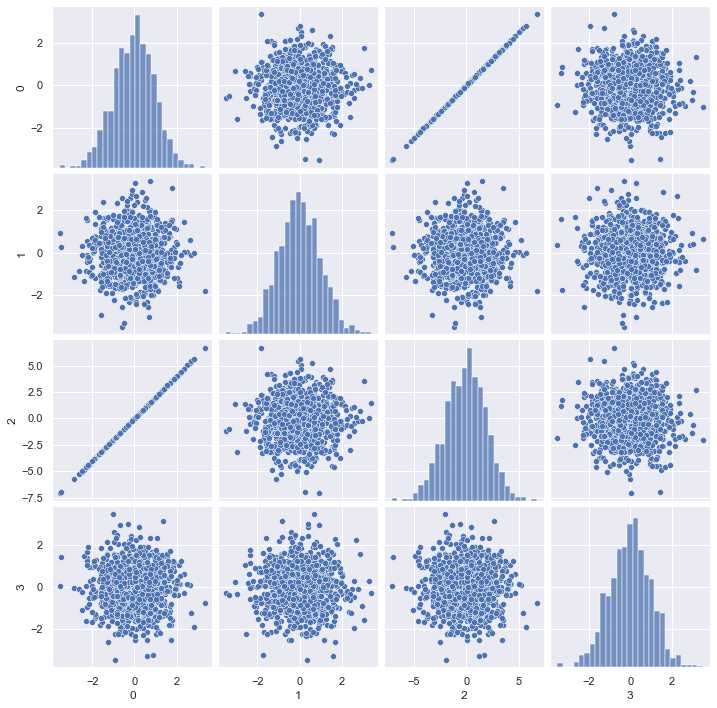

In [4]:
df = pd.DataFrame(X)
sns.pairplot(df)
plt.show()

Rysuję macierz korelacji za pomocą <tt>heatmap</tt>.

C:\Users\Hyperbook\AppData\Local\Temp\ipykernel_11728\3192322743.py:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



          0         1         2         3
0  1.000000  0.018965  1.000000 -0.014924
1  0.018965  1.000000  0.018965 -0.022375
2  1.000000  0.018965  1.000000 -0.014924
3 -0.014924 -0.022375 -0.014924  1.000000


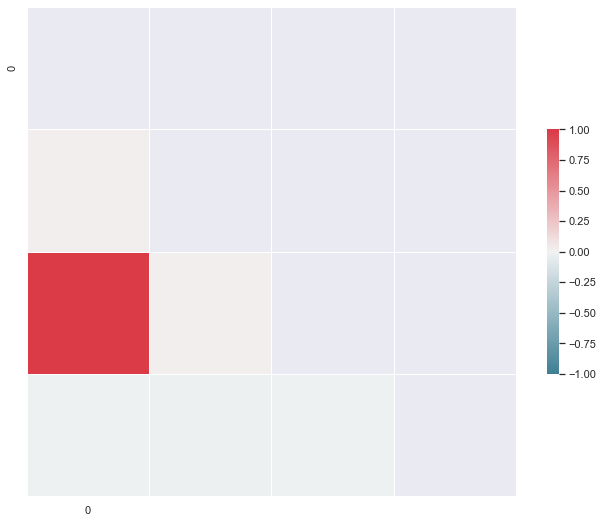

,0,1,2,3
0,1.000000,0.018965,1.000000,-0.014924
1,0.018965,1.000000,0.018965,-0.022375
2,1.000000,0.018965,1.000000,-0.014924
3,-0.014924,-0.022375,-0.014924,1.000000


In [14]:


sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = px.imshow((corr * (~mask)), text_auto=True)
fig.show()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie
Wygeneruj dane 10. wymiarowe tak by 

- 1 3 5 współrzedna były skorelowane ze sobą dodatnio
- 7 8 współrzedna były skorelowane ze sobą ujemnie
- pozostałe były nieskorelowane


In [30]:
n = 1000
s = [stats.norm(0, 1).rvs(n) for i in range(7)]

X = np.stack((s[0], s[1], 2 * s[0], s[2], 5 * s[0], s[3], s[4], -s[4], s[5], s[6]), 1)

df = pd.DataFrame(X)

fig = px.scatter_matrix(df)
fig.show()

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig2 = px.imshow(corr*~mask)
fig2.show()

C:\Users\Hyperbook\AppData\Local\Temp\ipykernel_11728\1555062540.py:12: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# Zad 
Dodaj kilka współrzednych tak by były skorelowanie nieliniowo np. $x^2$
* czy widać jakiś efekt na heat map

In [40]:
X = np.stack((s[0], s[1], 2 * s[0], s[2], 5 * s[0], s[3], s[4], -s[4], s[5], s[6], s[0] ** 2, np.abs(s[6]) ** (1/2)), 1)

df = pd.DataFrame(X)

fig=px.scatter_matrix((df))
fig.show()

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
mask = ~mask
# print(mask)


fig2=px.imshow(corr*mask)
fig2.show()


# Zadanie
Wykonaj wykresy
- sns.pairplot
- sns.heatmap

dla poniższego zbioru danych


In [61]:
from sklearn import datasets

boston = datasets.load_boston()
data = boston.data

In [63]:
dataF = pd.DataFrame(data)

fig=px.scatter_matrix(dataF)
fig.show()

corr = dataF.corr()
mask=np.zeros_like(corr, np.bool_)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig=px.imshow(corr*mask)
fig.show()